In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import make_column_selector
import matplotlib.cm as cm

In [292]:
link_csv = 'https://raw.githubusercontent.com/aameliasakinah/ClassificationNutritionTA/refs/heads/main/Data.csv'
data = pd.read_csv(link_csv)
data.head()

,No,NIK,Nama,JK,Tgl Lahir,BB Lahir,TB Lahir,Nama Ortu,Prov,Kab/Kota,...,TB/U,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,PMT Diterima (kg),Jml Vit A,KPSP,KIA,Detail
0,1,3314010911170002,NAUFAL ARFAN PRADYASTA,L,2019-11-09,2.8,0.0,TRI PAMONO,JAWA TENGAH,KAB SRAGEN,...,Normal,0.89,Normal,-0.85,N,-,NaN,-,-,
1,2,3314101709198620,ALFARO AFHAM SYAHRUR,L,2019-09-17,2.9,49.0,SELI PUSPITASARI-YOVI HASTO P,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.62,Normal,0.2,O,-,NaN,-,-,
2,3,3314016310190001,ALFIA KHOIRUN NISA,P,2019-10-23,3.0,0.0,SUSI RAHAYU-KRESNO KUNCORO,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.19,Normal,-0.58,N,-,NaN,-,-,
3,4,3314014909190001,ANANDA NATASYA MEDINA PUTRI,P,2019-09-09,3.4,0.0,LISTANTO-SILVI AMALIA,JAWA TENGAH,KAB SRAGEN,...,Normal,-1.44,Normal,0.74,N,-,NaN,-,-,
4,5,3314011309190001,MUH MAULANA,L,2019-09-13,3.0,48.0,MARDIANTO,JAWA TENGAH,KAB SRAGEN,...,Normal,-0.35,Gizi Kurang,-2.86,T,-,NaN,-,-,


In [293]:
data_columns = data.columns.to_list()
data_columns

['No',
 'NIK',
 'Nama',
 'JK',
 'Tgl Lahir',
 'BB Lahir',
 'TB Lahir',
 'Nama Ortu',
 'Prov',
 'Kab/Kota',
 'Kec',
 'Pukesmas',
 'Desa/Kel',
 'Posyandu',
 'RT',
 'RW',
 'Alamat',
 'Usia Saat Ukur',
 'Tanggal Pengukuran',
 'Berat',
 'Tinggi',
 'Cara Ukur',
 'LiLA',
 'BB/U',
 'ZS BB/U',
 'TB/U',
 'ZS TB/U',
 'BB/TB',
 'ZS BB/TB',
 'Naik Berat Badan',
 'PMT Diterima (kg)',
 'Jml Vit A',
 'KPSP',
 'KIA',
 'Detail']

# **PREPROCESSING**

## Data Cleaning

In [294]:
data = data.copy()
data.drop(columns=['No', 'NIK', 'Nama', 'Nama Ortu', 'Prov', 'Kab/Kota', 'Kec', 'Pukesmas', 'Desa/Kel',
                         'Posyandu', 'RT', 'RW', 'Alamat', 'Tanggal Pengukuran', 'Cara Ukur', 'BB/U', 'TB/U', 'ZS BB/U', 'ZS TB/U', 'ZS BB/TB',
                         'PMT Diterima (kg)', 'Jml Vit A', 'KPSP', 'KIA', 'Detail', 'Naik Berat Badan'],
                         inplace=True)

data.head()

,JK,Tgl Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/TB
0,L,2019-11-09,2.8,0.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113,NaN,Normal
1,L,2019-09-17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107,19.0,Normal
2,P,2019-10-23,3.0,0.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103,0.0,Normal
3,P,2019-09-09,3.4,0.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,0.0,Normal
4,L,2019-09-13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Gizi Kurang


In [295]:
columns = ['BB Lahir', 'TB Lahir', 'Berat', 'Tinggi', 'LiLA']
data[columns] = data[columns].apply(pd.to_numeric, errors="coerce")

# Date Time Columns
date_columns = ['Tgl Lahir']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors="coerce")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   JK              3129 non-null   object        
 1   Tgl Lahir       3129 non-null   datetime64[ns]
 2   BB Lahir        3129 non-null   float64       
 3   TB Lahir        3012 non-null   float64       
 4   Usia Saat Ukur  3129 non-null   object        
 5   Berat           3129 non-null   float64       
 6   Tinggi          3128 non-null   float64       
 7   LiLA            2746 non-null   float64       
 8   BB/TB           3129 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 220.1+ KB


In [296]:
data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,117
Usia Saat Ukur,0
Berat,0
Tinggi,1
LiLA,383
BB/TB,0


In [297]:
null_columns = data.columns[data.isna().any()]
data[null_columns] = data[null_columns].apply(lambda col: col.fillna(col.median()))
data.isna().sum()

,0
JK,0
Tgl Lahir,0
BB Lahir,0
TB Lahir,0
Usia Saat Ukur,0
Berat,0
Tinggi,0
LiLA,0
BB/TB,0


In [298]:
print((data == 0).sum())

JK                   0
Tgl Lahir            0
BB Lahir            39
TB Lahir           276
Usia Saat Ukur       0
Berat                0
Tinggi               0
LiLA              1104
BB/TB                0
dtype: int64


In [299]:
columns_w_zero = data.select_dtypes(include=['number']).columns[(data.select_dtypes(include=['number']) == 0).any()].tolist()
data[columns_w_zero] = data[columns_w_zero].apply(lambda col: col.mask(col == 0, col.median()))
print((data == 0).sum())

JK                0
Tgl Lahir         0
BB Lahir          0
TB Lahir          0
Usia Saat Ukur    0
Berat             0
Tinggi            0
LiLA              0
BB/TB             0
dtype: int64


In [300]:
total_duplikat = data.duplicated().sum()
print(f"Total Duplikat Data: {total_duplikat}")

Total Duplikat Data: 417


In [301]:
# Menghapus data duplikat dan menyimpan hasilnya kembali ke fix_data
data = data.drop_duplicates()

# Mengecek ulang jumlah duplikat setelah penghapusan
total_duplikat = data.duplicated().sum()
print(f"Total Duplikat Data Setelah Dihapus: {total_duplikat}")

Total Duplikat Data Setelah Dihapus: 0


In [302]:
data.head()

,JK,Tgl Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/TB
0,L,2019-11-09,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113.0,14.0,Normal
1,L,2019-09-17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107.0,19.0,Normal
2,P,2019-10-23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103.0,14.0,Normal
3,P,2019-09-09,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,14.0,Normal
4,L,2019-09-13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Gizi Kurang


## Data Formatting

In [303]:
#Tanggal Lahir
tanggal_lahir = data[["Tgl Lahir"]]
tahun_lahir = tanggal_lahir["Tgl Lahir"].dt.year.rename("Tahun Lahir")
bulan_lahir = tanggal_lahir["Tgl Lahir"].dt.month.rename("Bulan Lahir")
hari_lahir = tanggal_lahir["Tgl Lahir"].dt.day.rename("Hari Lahir")

list_columns = [tahun_lahir, bulan_lahir, hari_lahir]

for column in reversed(list_columns):
    idx = 2
    data.insert(idx, column.name, column)
    idx += 1

data.head()

,JK,Tgl Lahir,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/TB
0,L,2019-11-09,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113.0,14.0,Normal
1,L,2019-09-17,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107.0,19.0,Normal
2,P,2019-10-23,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103.0,14.0,Normal
3,P,2019-09-09,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,14.0,Normal
4,L,2019-09-13,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Gizi Kurang


In [304]:
# Drop Tgl Lahir and Tanggal Pengukuran Column
data.drop(columns=["Tgl Lahir"], inplace=True)
data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Berat,Tinggi,LiLA,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,18.2,113.0,14.0,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,17.8,107.0,19.0,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,15.3,103.0,14.0,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,17.1,102.5,14.0,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,14.1,108.2,16.0,Gizi Kurang


In [305]:
def format_usia(usia = list|dict|str):
    usia_format = usia.split(' - ')
    tahun_lahir = int(usia_format[0].split()[0])
    bulan_lahir = int(usia_format[1].split()[0])
    hari_lahir = int(usia_format[2].split()[0])
    total_bulan = tahun_lahir * 12 + bulan_lahir + hari_lahir / 30
    return round(total_bulan, 1)


data.insert(7, "Usia dalam bulan", data["Usia Saat Ukur"].apply(format_usia))
data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Usia dalam bulan,Berat,Tinggi,LiLA,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,18.2,113.0,14.0,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,17.8,107.0,19.0,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,15.3,103.0,14.0,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,17.1,102.5,14.0,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,14.1,108.2,16.0,Gizi Kurang


In [306]:
data.max()
data[["BB Lahir", 'TB Lahir']].max()

,0
BB Lahir,4200.0
TB Lahir,106.0


## Visualization Data

In [307]:
data.head()

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia Saat Ukur,Usia dalam bulan,Berat,Tinggi,LiLA,BB/TB
0,L,2019,11,9,2.8,49.0,4 Tahun - 10 Bulan - 4 Hari,58.1,18.2,113.0,14.0,Normal
1,L,2019,9,17,2.9,49.0,4 Tahun - 11 Bulan - 24 Hari,59.8,17.8,107.0,19.0,Normal
2,P,2019,10,23,3.0,49.0,4 Tahun - 10 Bulan - 12 Hari,58.4,15.3,103.0,14.0,Normal
3,P,2019,9,9,3.4,49.0,4 Tahun - 11 Bulan - 26 Hari,59.9,17.1,102.5,14.0,Normal
4,L,2019,9,13,3.0,48.0,4 Tahun - 11 Bulan - 21 Hari,59.7,14.1,108.2,16.0,Gizi Kurang


In [308]:
data.describe()

,Tahun Lahir,Bulan Lahir,Hari Lahir,BB Lahir,TB Lahir,Usia dalam bulan,Berat,Tinggi,LiLA
count,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000
mean,2021.558997,6.526917,15.660767,93.043626,48.480085,31.541593,11.502588,86.115450,15.069156
std,1.419753,3.419951,8.745677,511.809737,4.889067,16.497824,3.233732,12.846617,4.160122
min,2019.000000,1.000000,1.000000,0.350000,0.490000,0.000000,2.000000,43.000000,1.000000
25%,2020.000000,4.000000,8.000000,3.000000,48.000000,17.500000,9.300000,77.000000,14.000000
50%,2021.000000,6.000000,16.000000,3.000000,49.000000,32.600000,11.600000,88.000000,14.000000
75%,2023.000000,10.000000,23.000000,3.300000,49.000000,45.600000,13.700000,96.000000,15.500000
max,2024.000000,12.000000,31.000000,4200.000000,106.000000,60.100000,62.000000,115.000000,155.000000


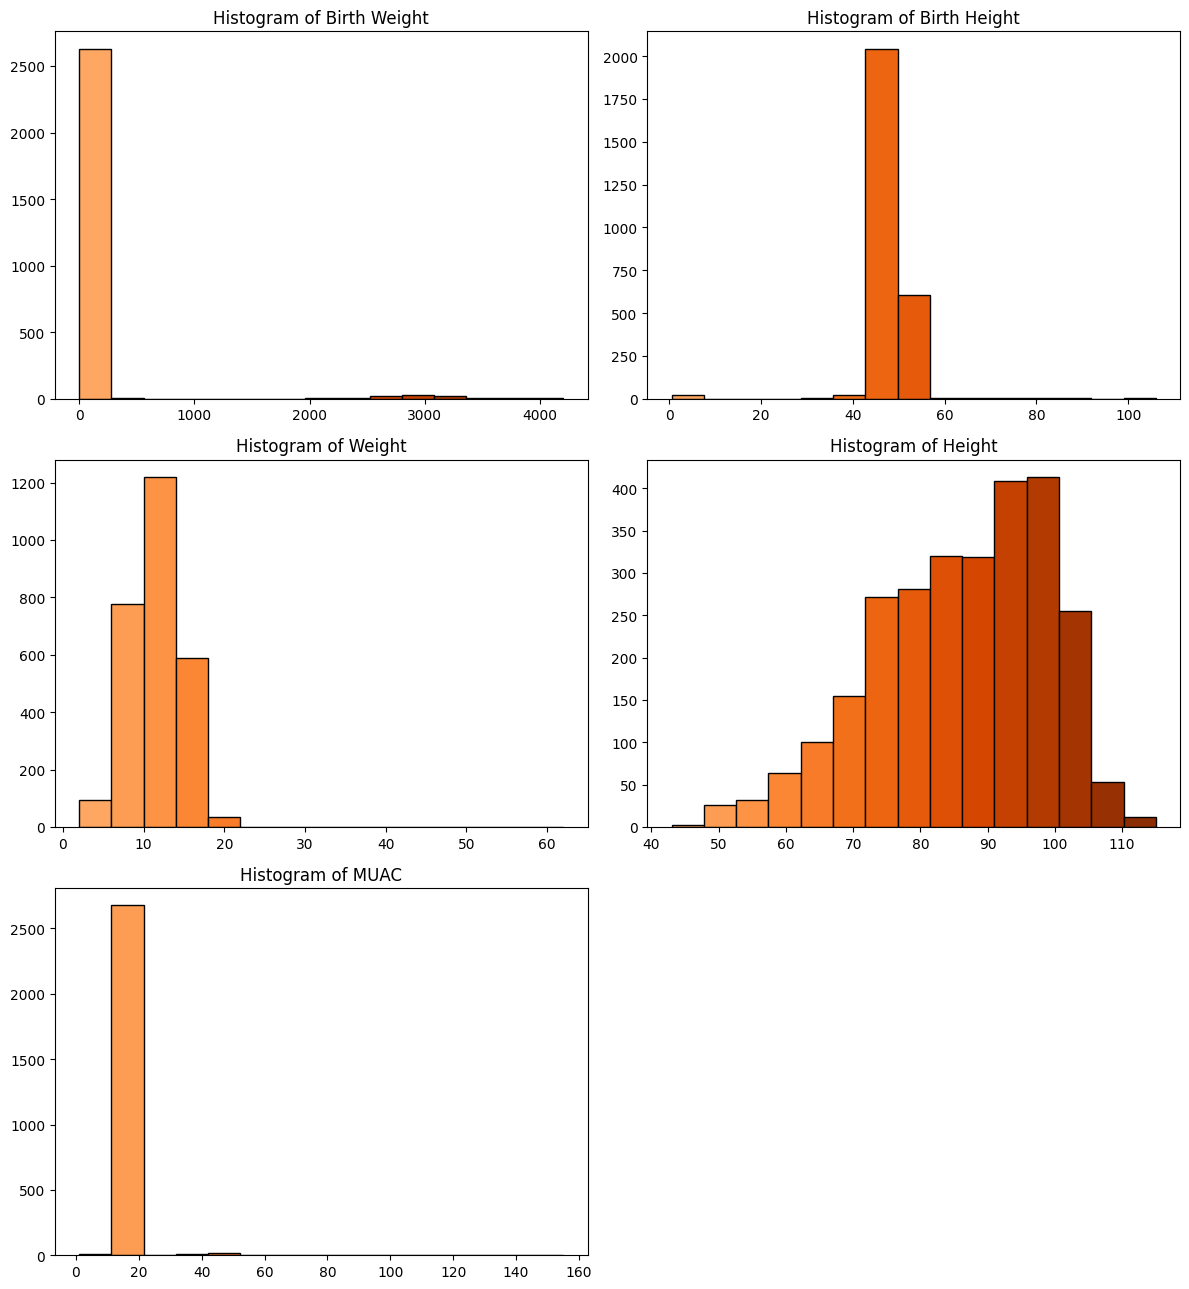

In [309]:
# Histogram dengan gradasi coklat-oranye
fig, axs = plt.subplots(3, 2, figsize=(12,13))

# Fungsi untuk plot histogram dengan gradasi
def hist_with_heatmap_tone(ax, data_col, title):
    counts, bins, patches = ax.hist(data_col.dropna(), bins=15, edgecolor='black')
    # Gradasi warna dari terang ke gelap coklat-oranye
    for i, patch in enumerate(patches):
        patch.set_facecolor(plt.cm.Oranges(0.4 + 0.6*i/len(patches)))  # mulai dari 0.4 ke 1.0
    ax.set_title(title)

# BB Lahir dan TB Lahir
hist_with_heatmap_tone(axs[0,0], data["BB Lahir"], "Histogram of Birth Weight")
hist_with_heatmap_tone(axs[0,1], data["TB Lahir"], "Histogram of Birth Height")

# Berat, Tinggi, dan LiLA (Saat Pengukuran)
hist_with_heatmap_tone(axs[1,0], data["Berat"], "Histogram of Weight")
hist_with_heatmap_tone(axs[1,1], data["Tinggi"], "Histogram of Height")
hist_with_heatmap_tone(axs[2,0], data["LiLA"], "Histogram of MUAC")

# Hapus subplot kosong
fig.delaxes(axs[2,1])

# Tata letak rapih
plt.tight_layout()

# Simpan hasil
plt.savefig("histogram_output_heatmap_tone.png", dpi=300)
plt.show()


/tmp/ipython-input-38768476.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orange_cmap = cm.get_cmap("Oranges")
/tmp/ipython-input-38768476.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data1, x="Value", y="Variable", palette=colors_1, ax=axs[0])
/tmp/ipython-input-38768476.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data2, x="Value", y="Variable", palette=colors_2, ax=axs[1])


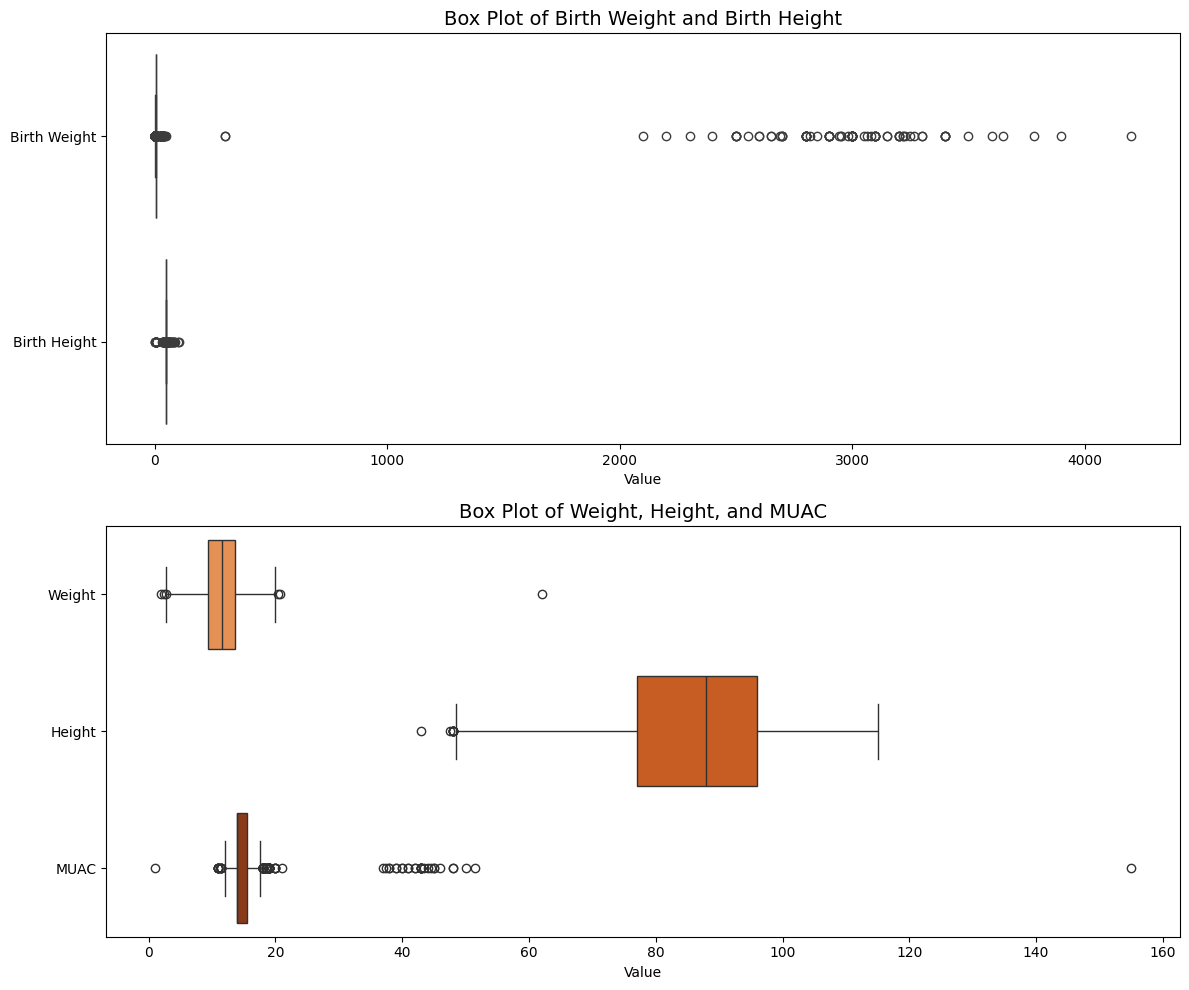

In [310]:
import matplotlib.cm as cm

data = data.rename(columns={
    "BB Lahir": "Birth Weight",
    "TB Lahir": "Birth Height",
    "Berat": "Weight",
    "Tinggi": "Height",
    "LiLA": "MUAC"
})

# Ambil colormap Oranges
orange_cmap = cm.get_cmap("Oranges")

# Buat warna gradasi orange sesuai jumlah kolom
colors_1 = [orange_cmap(i) for i in np.linspace(0.5, 0.8, 2)]  # Birth Weight & Height
colors_2 = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 3)]  # Weight, Height, MUAC

# Melt data menjadi long-format
data1 = pd.melt(data[["Birth Weight", "Birth Height"]], var_name="Variable", value_name="Value")
data2 = pd.melt(data[["Weight", "Height", "MUAC"]], var_name="Variable", value_name="Value")

# Plot
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Boxplot pertama
sns.boxplot(data = data1, x="Value", y="Variable", palette=colors_1, ax=axs[0])
axs[0].set_title("Box Plot of Birth Weight and Birth Height", fontsize=14)
axs[0].set_xlabel("Value")
axs[0].set_ylabel("")

# Boxplot kedua
sns.boxplot(data = data2, x="Value", y="Variable", palette=colors_2, ax=axs[1])
axs[1].set_title("Box Plot of Weight, Height, and MUAC", fontsize=14)
axs[1].set_xlabel("Value")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [311]:
#Kolom BB Lahir
Q1 = data["Birth Weight"].quantile(0.25)
Q2 = data["Birth Weight"].median()
Q3 = data["Birth Weight"].quantile(0.75)

IQR = Q3 - Q1 # Difference between Quantile 1 and 3

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

data["Birth Weight"] = data["Birth Weight"].mask((data["Birth Weight"] < lower_bound) | (data["Birth Weight"] > upper_bound), data["Birth Weight"].mean())
data.loc[((data["Birth Weight"] < lower_bound) | (data["Birth Weight"] > upper_bound))]

,JK,Tahun Lahir,Bulan Lahir,Hari Lahir,Birth Weight,Birth Height,Usia Saat Ukur,Usia dalam bulan,Weight,Height,MUAC,BB/TB
36,P,2019,10,18,93.043626,49.0,4 Tahun - 10 Bulan - 26 Hari,58.9,19.0,110.0,18.0,Normal
37,L,2019,10,3,93.043626,49.0,4 Tahun - 11 Bulan - 10 Hari,59.3,16.8,105.0,17.0,Normal
55,P,2020,7,17,93.043626,49.0,4 Tahun - 1 Bulan - 21 Hari,49.7,17.5,106.5,17.0,Normal
60,L,2020,3,31,93.043626,51.0,4 Tahun - 5 Bulan - 9 Hari,53.3,15.8,105.2,16.0,Normal
70,P,2020,7,1,93.043626,47.0,4 Tahun - 2 Bulan - 7 Hari,50.2,15.7,102.8,17.5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
3043,L,2020,2,27,93.043626,80.0,4 Tahun - 6 Bulan - 10 Hari,54.3,12.6,99.0,14.0,Gizi Kurang
3044,P,2021,2,26,93.043626,45.0,3 Tahun - 6 Bulan - 9 Hari,42.3,11.4,94.5,14.5,Gizi Kurang
3049,P,2021,12,6,93.043626,45.0,2 Tahun - 8 Bulan - 28 Hari,32.9,9.6,86.0,14.0,Gizi Kurang
3089,P,2023,6,5,93.043626,47.0,1 Tahun - 3 Bulan - 10 Hari,15.3,7.0,72.0,15.0,Gizi Kurang


In [312]:
#Kolom TB Lahir
TB_Q1 = data["Birth Height"].quantile(0.25)
TB_Q2 = data["Birth Height"].median()
TB_Q3 = data["Birth Height"].quantile(0.75)

IQR = TB_Q3 - TB_Q1

lower_bound = TB_Q1 - 1.5 * IQR
upper_bound = TB_Q3 + 1.5 * IQR

#Terlihat seperti normal, mari kita periksa apa saja outliers yang ekstrem
lower_bound, upper_bound

# Menutupi nilai outliers menggunakan Mean karena nilai Mean seperti normal
data["Birth Height"] = data["Birth Height"].mask((data["Birth Height"] < lower_bound) | (data["Birth Height"] > upper_bound), data["Birth Height"].mean())
data["Birth Height"].loc[((data["Birth Height"] < lower_bound) | (data["Birth Height"] > upper_bound))]


,Birth Height


In [313]:
#Kolom LiLA
MUAC_Q1 = data["MUAC"].quantile(0.25)
MUAC_Q2 = data["MUAC"].median()
MUAC_Q3 = data["MUAC"].quantile(0.75)

IQR_MUAC = MUAC_Q3 - MUAC_Q1

lower_bound_MUAC = MUAC_Q1 - 1.5 * IQR_MUAC
upper_bound_MUAC = MUAC_Q3 + 1.5 * IQR_MUAC

lower_bound_MUAC, upper_bound_MUAC

# Mengganti nilai outlier dengan rata-rata
data["MUAC"] = data["MUAC"].mask(
    (data["MUAC"] < lower_bound_MUAC) | (data["MUAC"] > upper_bound_MUAC),
    data["MUAC"].mean()
)

# Menampilkan data yang sebelumnya terdeteksi sebagai outlier
data["MUAC"].loc[
    ((data["MUAC"] < lower_bound_MUAC) | (data["MUAC"] > upper_bound_MUAC))
]

,MUAC


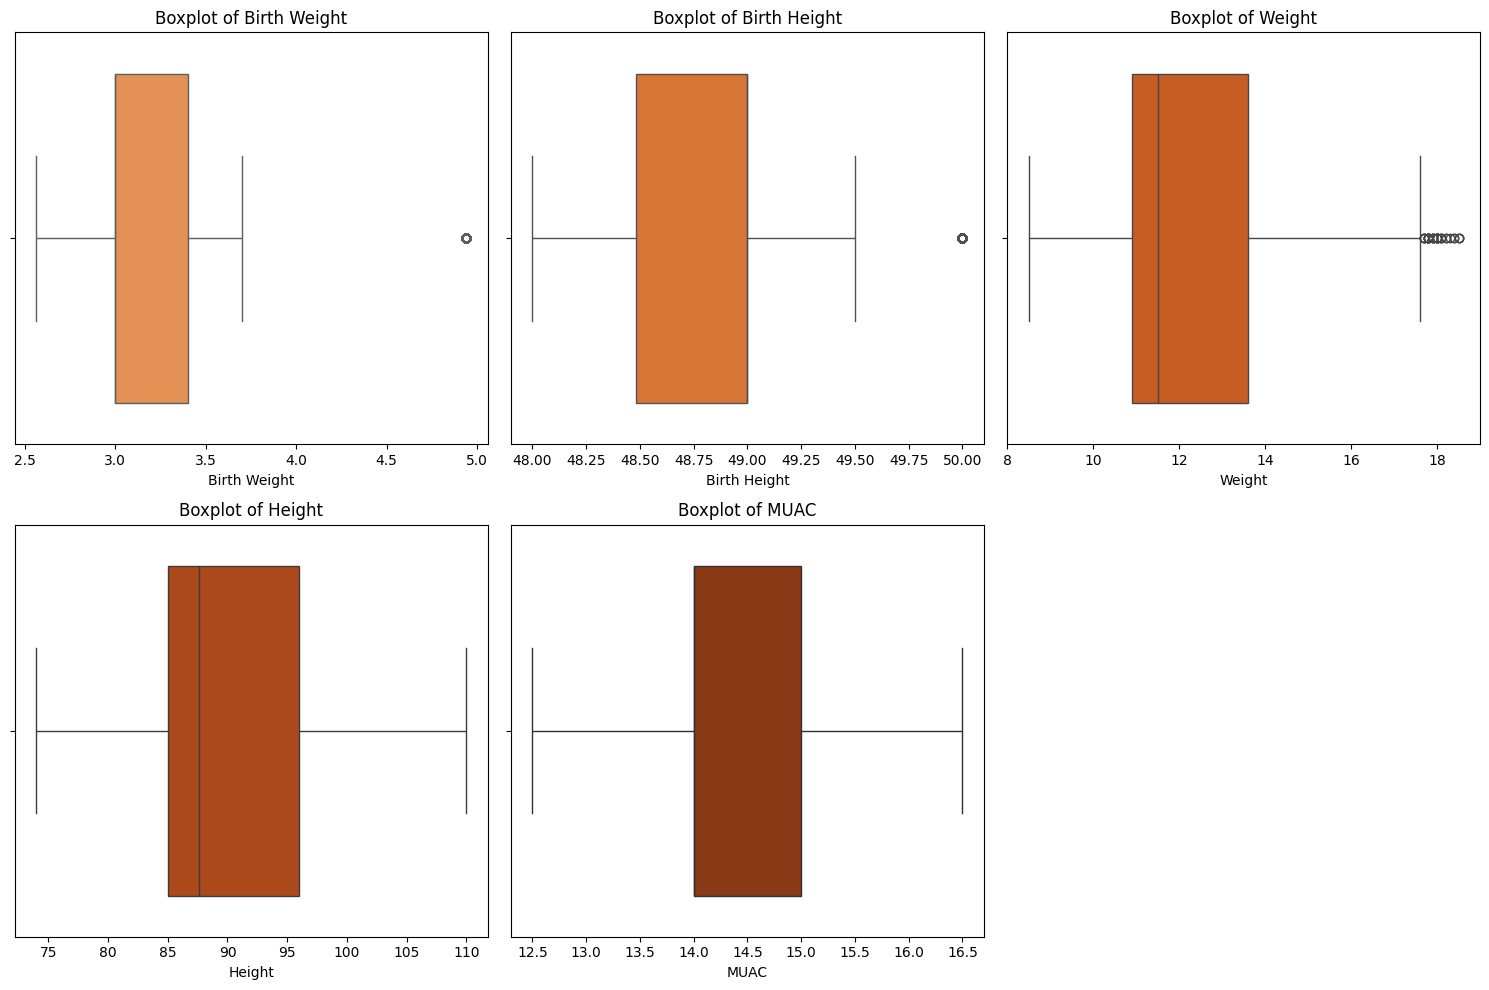

In [314]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

# ===============================
# Step 1: Rename kolom
# ===============================
data = data.rename(columns={
    "BB Lahir": "Birth Weight",
    "TB Lahir": "Birth Height",
    "Berat": "Weight",
    "Tinggi": "Height",
    "LiLA": "MUAC"
})

# ===============================
# Step 2: Atur batas medis
# ===============================
limits = {
    "Birth Weight": (2.5, 4.0),   # kg
    "Birth Height": (48, 52),     # cm
    "Weight": (8.5, 18.5),        # kg
    "Height": (74, 110),          # cm
    "MUAC": (10, 25)              # cm, contoh range wajar
}

# ===============================
# Step 3: Fungsi penanganan outlier
# ===============================
def clean_column(df, column, lower_medical, upper_medical):
    # IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5*IQR
    upper_iqr = Q3 + 1.5*IQR

    # Ganti outlier IQR dengan mean
    df[column] = df[column].mask(
        (df[column] < lower_iqr) | (df[column] > upper_iqr),
        df[column].mean()
    )

    # Ganti nilai di luar batas medis dengan mean
    df[column] = df[column].mask(
        (df[column] < lower_medical) | (df[column] > upper_medical),
        df[column].mean()
    )
    return df

# Bersihkan semua kolom
for col, (low, high) in limits.items():
    data = clean_column(data, col, low, high)

# ===============================
# Step 4: Plot boxplot grid
# ===============================
orange_cmap = matplotlib.colormaps["Oranges"]
colors = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 5)]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x=data["Birth Weight"], ax=axs[0, 0], color=colors[0])
axs[0, 0].set_title("Boxplot of Birth Weight")

sns.boxplot(x=data["Birth Height"], ax=axs[0, 1], color=colors[1])
axs[0, 1].set_title("Boxplot of Birth Height")

sns.boxplot(x=data["Weight"], ax=axs[0, 2], color=colors[2])
axs[0, 2].set_title("Boxplot of Weight")

sns.boxplot(x=data["Height"], ax=axs[1, 0], color=colors[3])
axs[1, 0].set_title("Boxplot of Height")

sns.boxplot(x=data["MUAC"], ax=axs[1, 1], color=colors[4])
axs[1, 1].set_title("Boxplot of MUAC")

# Hapus subplot kosong
fig.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()

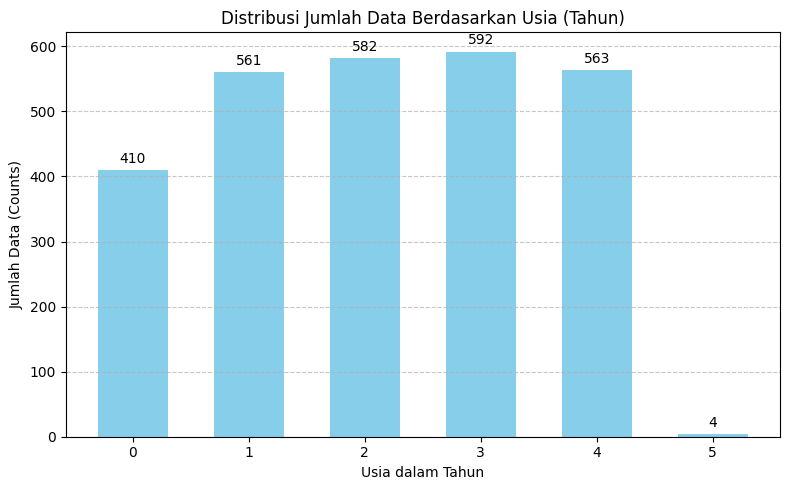

In [315]:
import matplotlib.pyplot as plt

# Konversi usia ke tahun dengan pembulatan ke bawah (bilangan bulat)
data["Usia dalam Tahun"] = data["Usia dalam bulan"] // 12

# Hitung jumlah data untuk tiap usia dalam tahun
usia_counts = data["Usia dalam Tahun"].value_counts().sort_index()

# Buat bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(usia_counts.index, usia_counts.values, color="skyblue", width=0.6)

# Tambahkan label dan judul
ax.set_xlabel("Usia dalam Tahun")
ax.set_ylabel("Jumlah Data (Counts)")
ax.set_title("Distribusi Jumlah Data Berdasarkan Usia (Tahun)")

# Tambahkan garis grid horizontal
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label nilai di atas batang
ax.bar_label(bars, fmt='%d', padding=3, fontsize=10, color='black')

# Tampilkan plot
plt.tight_layout()
plt.show()

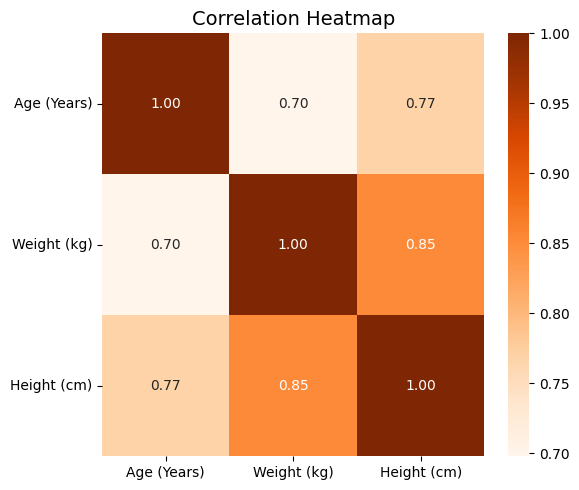

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih dan salin kolom yang dibutuhkan
data_heatmap = data[['Usia dalam Tahun', 'Weight', 'Height']].copy()

# Pastikan semuanya numerik
data_heatmap = data_heatmap.apply(pd.to_numeric, errors='coerce')

# Hapus baris yang mengandung NaN
data_heatmap.dropna(inplace=True)

# Dictionary label ke Bahasa Inggris
column_labels = {
    "Usia dalam Tahun": "Age (Years)",
    "Weight": "Weight (kg)",
    "Height": "Height (cm)"
}

# Plot heatmap
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(data_heatmap.corr(), annot=True, cmap="Oranges", fmt=".2f", ax=ax)

# Ubah label sumbu ke Bahasa Inggris
ax.set_xticklabels([column_labels[col] for col in data_heatmap.columns], rotation=0, ha="center")
ax.set_yticklabels([column_labels[col] for col in data_heatmap.columns], rotation=0)

# Judul dan simpan file
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("Heatmap_of_Feature_Correlation_Oranges.png", dpi=300, bbox_inches="tight")

plt.show()

## Encode

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2712 entries, 0 to 3126
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JK                2712 non-null   object 
 1   Tahun Lahir       2712 non-null   int32  
 2   Bulan Lahir       2712 non-null   int32  
 3   Hari Lahir        2712 non-null   int32  
 4   Birth Weight      2712 non-null   float64
 5   Birth Height      2712 non-null   float64
 6   Usia Saat Ukur    2712 non-null   object 
 7   Usia dalam bulan  2712 non-null   float64
 8   Weight            2712 non-null   float64
 9   Height            2712 non-null   float64
 10  MUAC              2712 non-null   float64
 11  BB/TB             2712 non-null   object 
 12  Usia dalam Tahun  2712 non-null   float64
dtypes: float64(7), int32(3), object(3)
memory usage: 264.8+ KB


In [318]:
from sklearn.preprocessing import LabelEncoder

bb_tb_mapping = {
    'Normal': 0,
    'Gizi Kurang': 1,
    'Beresiko Gizi Lebih': 2,
    'Outlier': 2,
    'Gizi Lebih': 2,
    'Gizi Buruk': 2,
    'Obesitas': 2
}

# Melakukan encoding dengan mapping
data["Encode BB/TB"] = data["BB/TB"].map(bb_tb_mapping)

# Jika ada kategori yang tidak masuk dalam mapping, bisa diisi dengan nilai default (misal: -1)
data.fillna(-1, inplace=True)

In [319]:
# Menghitung jumlah kategori
bb_tb_counts = data["Encode BB/TB"].value_counts().sort_index()

# Pemetaan kode ke kategori asli yang benar
category_labels_bb_tb = {0: 'Beresiko Gizi Lebih', 1: 'Gizi Buruk', 2: 'Gizi Kurang',
                         3: 'Gizi Lebih', 4: 'Normal', 5: 'Obesitas', 6: 'Outlier'}

In [320]:
data[["Encode BB/TB"]].value_counts()

,count
Encode BB/TB,
0,2426
2,162
1,124


In [321]:
data.drop(["JK", "Usia Saat Ukur", "BB/TB"], axis=1, inplace=True)
data.head()

,Tahun Lahir,Bulan Lahir,Hari Lahir,Birth Weight,Birth Height,Usia dalam bulan,Weight,Height,MUAC,Usia dalam Tahun,Encode BB/TB
0,2019,11,9,2.8,49.0,58.1,18.2,86.243967,14.000000,4.0,0
1,2019,9,17,2.9,49.0,59.8,17.8,107.000000,15.069156,4.0,0
2,2019,10,23,3.0,49.0,58.4,15.3,103.000000,14.000000,4.0,0
3,2019,9,9,3.4,49.0,59.9,17.1,102.500000,14.000000,4.0,0
4,2019,9,13,3.0,48.0,59.7,14.1,108.200000,16.000000,4.0,1


/tmp/ipython-input-1391166860.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orange_cmap = cm.get_cmap('Oranges')
/tmp/ipython-input-1391166860.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_bbtb, y=data_bbtb.values, palette=colors_bbtb, ax=ax)


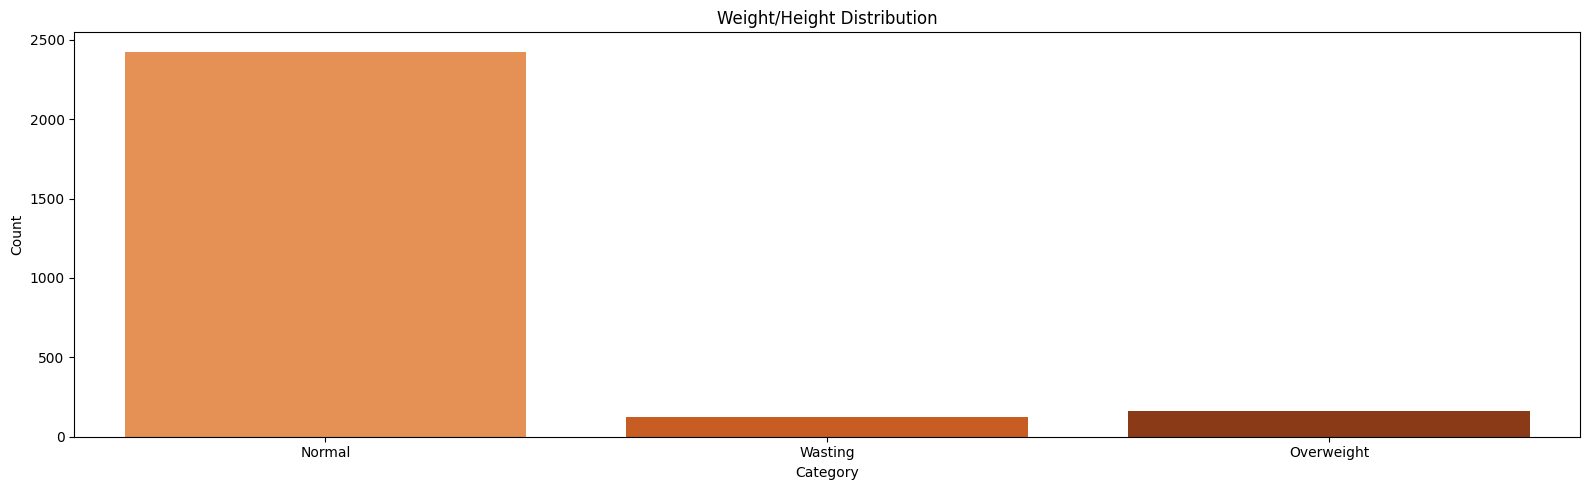

In [322]:
# Ambil kolom kategori
data_subset = data[["Encode BB/TB"]]

# Hitung distribusi nilai
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

# Definisi label kategori
labels_bbtb = ["Normal", "Wasting", "Overweight"]

# Ambil gradasi warna dari colormap 'Oranges'
orange_cmap = cm.get_cmap('Oranges')
colors_bbtb = [orange_cmap(i) for i in np.linspace(0.5, 0.9, 3)]   # untuk 3 kategori

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(16, 5))

sns.barplot(x=labels_bbtb, y=data_bbtb.values, palette=colors_bbtb, ax=ax)
ax.set_title("Weight/Height Distribution")
ax.set_xlabel("Category")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [323]:
# Ambil kolom kategori
data_subset = data[["Encode BB/TB"]]

# Hitung distribusi nilai
data_bbtb = data["Encode BB/TB"].value_counts().sort_index()

# Definisi label kategori
labels_bbtb = ["Normal", "Wasting", "Overweight"]

# Menyusun hasil dalam bentuk tabel
print("\nDistribusi Weight-for-Height (BB/TB):")
for label, count in zip(labels_bbtb, data_bbtb):
    print(f"{label}: {count}")


Distribusi Weight-for-Height (BB/TB):
Normal: 2426
Wasting: 124
Overweight: 162


In [324]:
# Konversi usia ke tahun (dibulatkan ke bawah)
usia_tahun = data["Usia dalam bulan"] // 12

# Tambahkan kolom baru jika belum ada
if "Usia (Tahun)" not in data.columns:
    data.insert(6, "Usia (Tahun)", usia_tahun)

# Filter data dengan usia 0 tahun atau kurang
filter = data["Usia (Tahun)"] <= 0

# Tampilkan data yang memenuhi kondisi
invalid_usia = data.loc[filter]

# Menampilkan ringkasan frekuensi dari data tidak valid
print("Jumlah data dengan usia <= 0 tahun:")
print(invalid_usia.value_counts())

Jumlah data dengan usia <= 0 tahun:
Tahun Lahir  Bulan Lahir  Hari Lahir  Birth Weight  Birth Height  Usia dalam bulan  Usia (Tahun)  Weight     Height     MUAC       Usia dalam Tahun  Encode BB/TB
2024         5            28          4.939587      48.480085     3.3               0.0           11.487366  86.243967  14.000000  0.0               0               2
                          12          3.100000      49.000000     4.0               0.0           11.487366  86.243967  14.000000  0.0               0               2
                          2           3.600000      48.000000     4.2               0.0           11.487366  86.243967  15.500000  0.0               0               1
                                      3.000000      48.000000     4.2               0.0           11.487366  86.243967  14.500000  0.0               2               1
             4            29          3.500000      48.480085     4.6               0.0           11.487366  86.243967  14.000000  0.0

In [325]:
# Misalkan 'Encode BB/U', 'Encode TB/U', dan 'Encode BB/TB' adalah target
# Pastikan fix_data memiliki kolom-kolom tersebut
X = data.drop(['Encode BB/TB'], axis=1)  # Fitur
y = data[['Encode BB/TB']]  # Target

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Tampilkan 5 baris pertama dari training set
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())


X_train:
      Tahun Lahir  Bulan Lahir  Hari Lahir  Birth Weight  Birth Height  \
445          2021            4          11      4.939587          49.0   
1093         2021           12          27      3.000000          48.0   
764          2021           11          22      3.300000          50.0   
755          2021            4          30      4.939587          50.0   
964          2020            8          21      4.939587          50.0   

      Usia dalam bulan  Usia (Tahun)  Weight  Height       MUAC  \
445               41.2           3.0    12.0    92.0  15.000000   
1093              32.4           2.0    12.5    88.0  16.000000   
764               33.5           2.0    14.2    95.3  16.000000   
755               40.2           3.0    14.5    95.0  14.000000   
964               48.4           4.0    16.0    98.5  15.069156   

      Usia dalam Tahun  
445                3.0  
1093               2.0  
764                2.0  
755                3.0  
964               

## K-NN


Classification Report for Weight/Height (Encode BB/TB):
              precision    recall  f1-score   support

      Normal       0.92      0.88      0.90       488
     Wasting       0.17      0.27      0.21        22
  Overweight       0.21      0.24      0.23        33

    accuracy                           0.82       543
   macro avg       0.43      0.47      0.44       543
weighted avg       0.84      0.82      0.83       543

Accuracy_knn: 81.77%
Precision_knn: 84.35%
Recall_knn: 81.77%
F1-Score_knn: 82.97%


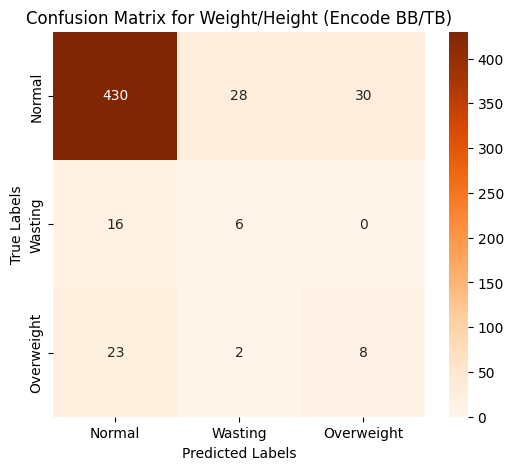

Confusion matrix disimpan di folder: output


In [326]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Fokuskan hanya pada kolom target "Encode BB/TB"
X = data.drop(columns=['Encode BB/TB'])  # Fitur
y = data['Encode BB/TB']  # Target hanya untuk "Encode BB/TB"

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk preprocessing dan model KNN dengan RandomOverSampler
pipeline = ImbPipeline([
    ('oversampling', RandomOverSampler(random_state=42)),  # Menangani ketidakseimbangan kelas
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),  # Mengisi nilai yang hilang
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)  # Transformasi log untuk fitur
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),  # Standarisasi fitur
    ('knn', KNeighborsClassifier(n_neighbors=3))  # Gantilah jumlah tetangga sesuai kebutuhan
])

# Melatih model dengan data training
pipeline.fit(X_train, y_train)

# Prediksi pada data uji
predictions_knn = pipeline.predict(X_test)

# Definisi label kategori untuk target "Encode BB/TB"
labels_dict = ["Normal", "Wasting", "Overweight"]  # Label untuk kelas gizi buruk, kurang, dan normal

# Buat folder output jika belum ada
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Evaluasi model
print(f"\nClassification Report for Weight/Height (Encode BB/TB):")
print(classification_report(y_test, predictions_knn, target_names=labels_dict, zero_division=1))

# Hitung metrik evaluasi
acc = accuracy_score(y_test, predictions_knn)
prec = precision_score(y_test, predictions_knn, average='weighted', zero_division=1)
rec = recall_score(y_test, predictions_knn, average='weighted')
f1 = f1_score(y_test, predictions_knn, average='weighted')

print(f"Accuracy_knn: {acc:.2%}")
print(f"Precision_knn: {prec:.2%}")
print(f"Recall_knn: {rec:.2%}")
print(f"F1-Score_knn: {f1:.2%}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels_dict, yticklabels=labels_dict)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Weight/Height (Encode BB/TB)")

# Simpan gambar dengan nama file yang valid
save_path = os.path.join(output_dir, "confusion_matrix_encode_BB_TB.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Confusion matrix disimpan di folder: {output_dir}")


/tmp/ipython-input-203121844.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


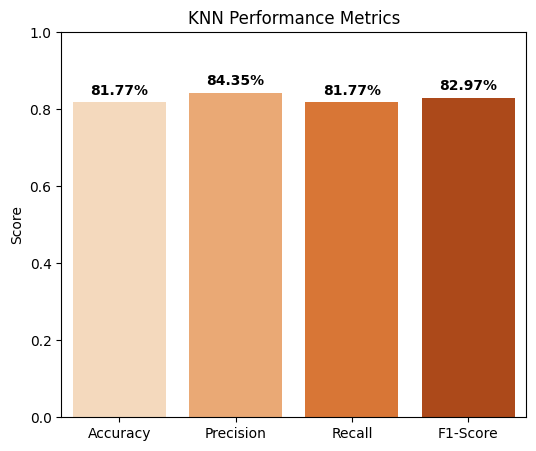

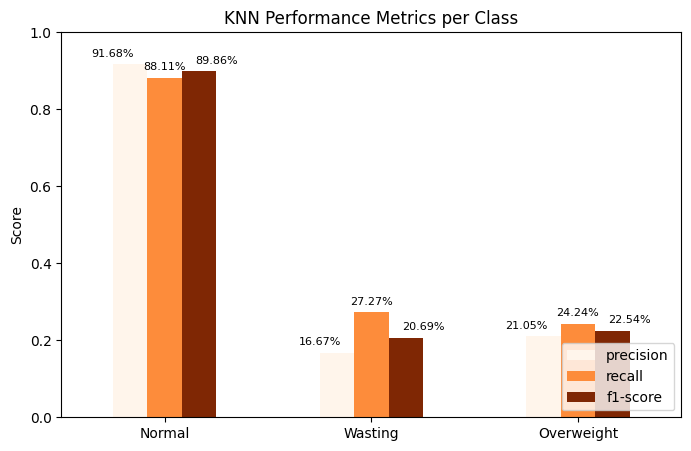

In [327]:
# =======================
# Visualisasi metrik agregat (tone warna "Oranges")
# =======================
metrics_values = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-Score': f1
}

plt.figure(figsize=(6, 5))
sns.barplot(
    x=list(metrics_values.keys()),
    y=list(metrics_values.values()),
    palette=sns.color_palette("Oranges", n_colors=len(metrics_values))
)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("KNN Performance Metrics")
for i, v in enumerate(metrics_values.values()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()

# =======================
# Visualisasi metrik per kelas (tone warna "Oranges")
# =======================
report_dict = classification_report(
    y_test, predictions_knn, target_names=labels_dict, zero_division=1, output_dict=True
)
df_report = pd.DataFrame(report_dict).transpose().iloc[:len(labels_dict), :3]

df_report.plot(
    kind='bar',
    figsize=(8, 5),
    colormap='Oranges'
)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("KNN Performance Metrics per Class")
plt.xticks(rotation=0)
for i, row in enumerate(df_report.values):
    for j, val in enumerate(row):
        plt.text(i + j/4 - 0.25, val + 0.02, f"{val:.2%}", ha='center', fontsize=8)
plt.legend(loc='lower right')
plt.show()

## SVM


Classification Report for Weight/Height (Encode BB/TB) - SVM:
              precision    recall  f1-score   support

      Normal       0.96      0.79      0.87       488
     Wasting       0.25      0.64      0.36        22
  Overweight       0.21      0.58      0.31        33

    accuracy                           0.77       543
   macro avg       0.48      0.67      0.51       543
weighted avg       0.89      0.77      0.81       543

Accuracy_svm: 76.80%
Precision_svm: 89.02%
Recall_svm: 76.80%
F1-Score_svm: 81.25%


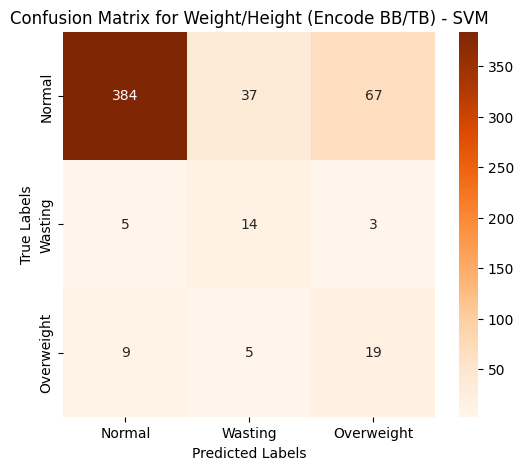

Confusion matrix disimpan di folder: output


In [328]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# =======================
# 1. Persiapan Data
# =======================
# Fokuskan hanya pada kolom target "Encode BB/TB"
X = data.drop(columns=['Encode BB/TB'])  # Fitur
y = data['Encode BB/TB']                 # Target

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 2. Pipeline SVM
# =======================
pipeline = ImbPipeline([
    ('oversampling', RandomOverSampler(random_state=42)),  # Menangani imbalance
    ('preprocessing', ColumnTransformer([
        ('imputer', SimpleImputer(strategy='mean'), X.columns),
        ('log', FunctionTransformer(np.log1p, validate=True), X.columns)
    ], remainder='passthrough', verbose_feature_names_out=False)),
    ('scaler', StandardScaler()),  # Standarisasi fitur
    ('svc', SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42))  # Model SVM
])

# =======================
# 3. Latih Model
# =======================
pipeline.fit(X_train, y_train)

# Prediksi
predictions_svm = pipeline.predict(X_test)

# =======================
# 4. Evaluasi
# =======================
labels_dict = ["Normal", "Wasting", "Overweight"]  # Label untuk target Encode BB/TB
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

print("\nClassification Report for Weight/Height (Encode BB/TB) - SVM:")
print(classification_report(y_test, predictions_svm, target_names=labels_dict, zero_division=1))

acc = accuracy_score(y_test, predictions_svm)
prec = precision_score(y_test, predictions_svm, average='weighted', zero_division=1)
rec = recall_score(y_test, predictions_svm, average='weighted')
f1 = f1_score(y_test, predictions_svm, average='weighted')

print(f"Accuracy_svm: {acc:.2%}")
print(f"Precision_svm: {prec:.2%}")
print(f"Recall_svm: {rec:.2%}")
print(f"F1-Score_svm: {f1:.2%}")

# =======================
# 5. Plot Confusion Matrix
# =======================
cm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels_dict, yticklabels=labels_dict)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Weight/Height (Encode BB/TB) - SVM")

save_path = os.path.join(output_dir, "confusion_matrix_encode_BB_TB_svm.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Confusion matrix disimpan di folder: {output_dir}")


/tmp/ipython-input-924021652.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


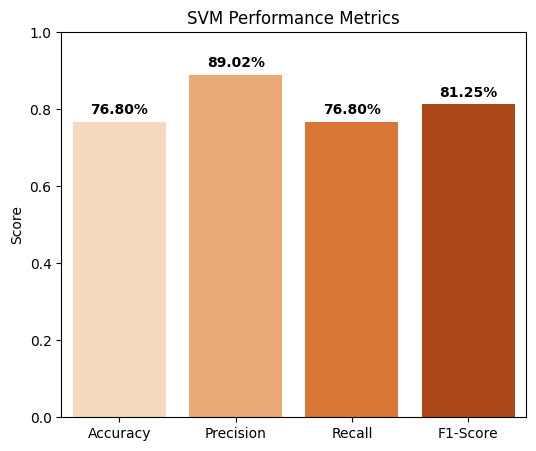

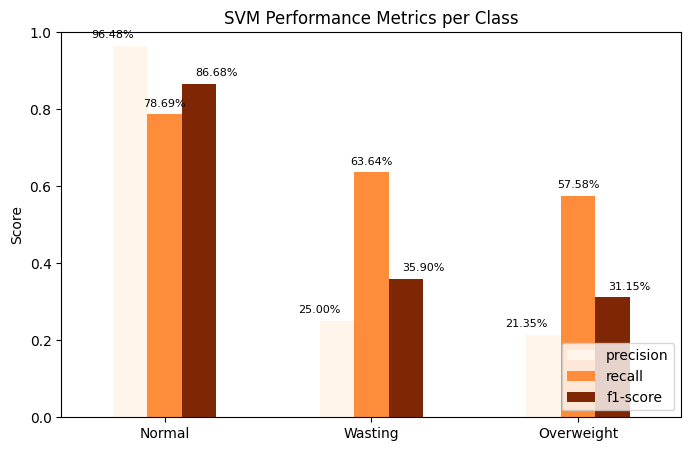

In [329]:
import pandas as pd

# =======================
# Hitung metrik SVM
# =======================
acc_svm  = accuracy_score(y_test, predictions_svm)
prec_svm = precision_score(y_test, predictions_svm, average='weighted', zero_division=1)
rec_svm  = recall_score(y_test, predictions_svm, average='weighted', zero_division=1)
f1_svm   = f1_score(y_test, predictions_svm, average='weighted', zero_division=1)

# =======================
# Visualisasi metrik agregat SVM (tone warna "Oranges")
# =======================
metrics_values_svm = {
    'Accuracy': acc_svm,
    'Precision': prec_svm,
    'Recall': rec_svm,
    'F1-Score': f1_svm
}

plt.figure(figsize=(6, 5))
sns.barplot(
    x=list(metrics_values_svm.keys()),
    y=list(metrics_values_svm.values()),
    palette=sns.color_palette("Oranges", n_colors=len(metrics_values_svm))
)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("SVM Performance Metrics")
for i, v in enumerate(metrics_values_svm.values()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()

# =======================
# Visualisasi metrik per kelas SVM (tone warna "Oranges")
# =======================
report_dict_svm = classification_report(
    y_test, predictions_svm, target_names=labels_dict, zero_division=1, output_dict=True
)
df_report_svm = pd.DataFrame(report_dict_svm).transpose().iloc[:len(labels_dict), :3]

df_report_svm.plot(
    kind='bar',
    figsize=(8, 5),
    colormap='Oranges'
)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("SVM Performance Metrics per Class")
plt.xticks(rotation=0)
for i, row in enumerate(df_report_svm.values):
    for j, val in enumerate(row):
        plt.text(i + j/4 - 0.25, val + 0.02, f"{val:.2%}", ha='center', fontsize=8)
plt.legend(loc='lower right')
plt.show()


===== Comparison KNN vs SVM =====
  Model  Accuracy  Precision    Recall  F1-Score
0   KNN  0.817680   0.843525  0.817680  0.829697
1   SVM  0.767956   0.890201  0.767956  0.812492


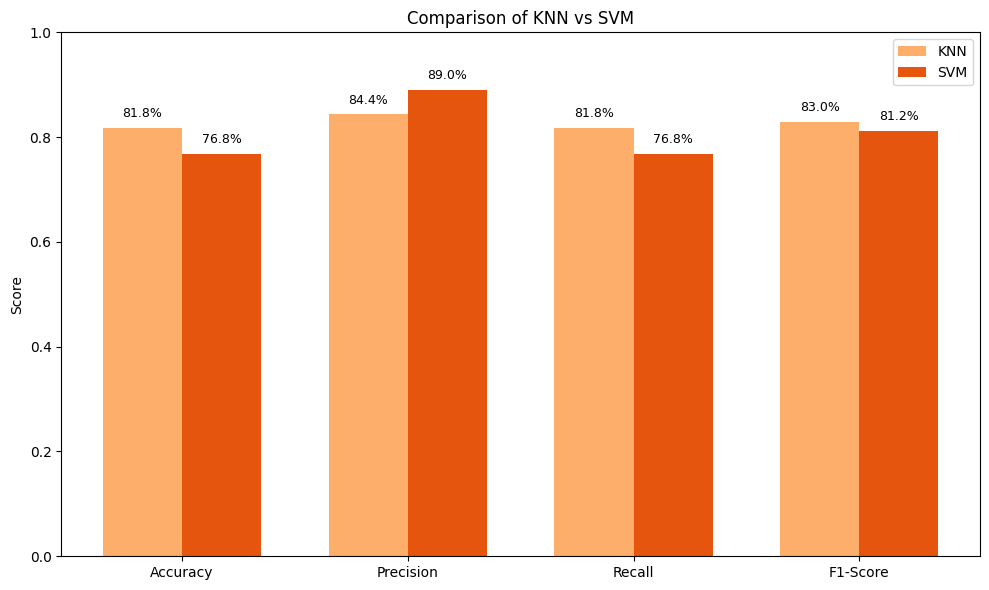

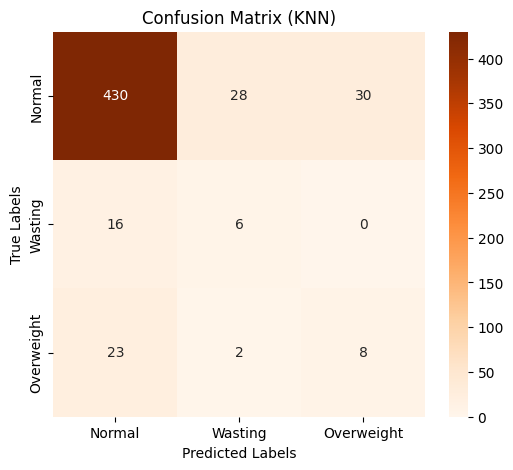

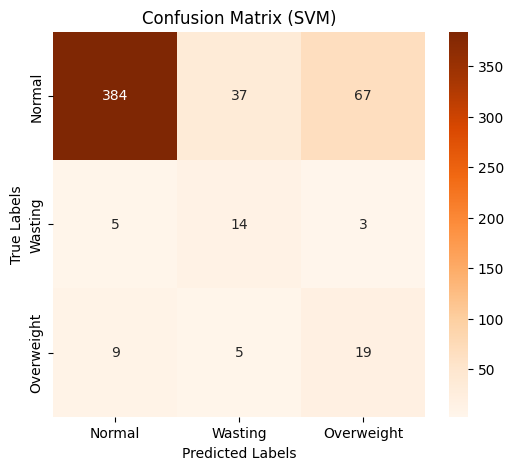

In [330]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.cm as cm

# =======================
# Siapkan direktori output
# =======================
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# =======================
# Hitung metrik KNN
# =======================
acc_knn  = accuracy_score(y_test, predictions_knn)
prec_knn = precision_score(y_test, predictions_knn, average='weighted', zero_division=1)
rec_knn  = recall_score(y_test, predictions_knn, average='weighted', zero_division=1)
f1_knn   = f1_score(y_test, predictions_knn, average='weighted', zero_division=1)

# =======================
# Hitung metrik SVM
# =======================
acc_svm  = accuracy_score(y_test, predictions_svm)
prec_svm = precision_score(y_test, predictions_svm, average='weighted', zero_division=1)
rec_svm  = recall_score(y_test, predictions_svm, average='weighted', zero_division=1)
f1_svm   = f1_score(y_test, predictions_svm, average='weighted', zero_division=1)

# =======================
# Buat DataFrame perbandingan
# =======================
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
results_df = pd.DataFrame({
    "Model": ["KNN", "SVM"],
    "Accuracy": [acc_knn, acc_svm],
    "Precision": [prec_knn, prec_svm],
    "Recall": [rec_knn, rec_svm],
    "F1-Score": [f1_knn, f1_svm]
})

print("\n===== Comparison KNN vs SVM =====")
print(results_df)

# Simpan ke CSV
results_df.to_csv(os.path.join(output_dir, "comparison_knn_svm.csv"), index=False)

# =======================
# Visualisasi perbandingan metrik agregat (2 warna solid)
# =======================
bar_width = 0.35
index = np.arange(len(metrics))

# Warna tetap untuk tiap model
color_knn = "#fdae6b"  # Oranye terang
color_svm = "#e6550d"  # Oranye gelap

fig, ax = plt.subplots(figsize=(10,6))
bars_knn = ax.bar(index - bar_width/2, results_df.loc[0, metrics],
                  bar_width, label="KNN", color=color_knn)
bars_svm = ax.bar(index + bar_width/2, results_df.loc[1, metrics],
                  bar_width, label="SVM", color=color_svm)

ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Comparison of KNN vs SVM")
ax.legend()

# Tambahkan label persentase
for bars in [bars_knn, bars_svm]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f"{height*100:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# =======================
# Confusion Matrix KNN dan SVM
# =======================
labels = ["Normal", "Wasting", "Overweight"]

def plot_cm(y_true, y_pred, model_name):
    cmatrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Oranges',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.savefig(os.path.join(output_dir, f"confusion_matrix_{model_name.lower()}.png"),
                dpi=300, bbox_inches='tight')
    plt.show()

plot_cm(y_test, predictions_knn, "KNN")
plot_cm(y_test, predictions_svm, "SVM")